In [521]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [522]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [523]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
combine = [train_df, test_df]

In [524]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [525]:
#查看資料集缺失值以及資料型態
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [526]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Pclass column

<AxesSubplot:xlabel='Pclass', ylabel='count'>

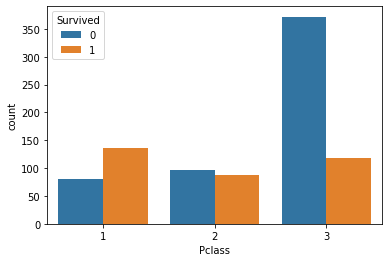

In [527]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)

In [528]:
train_df_p = train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()
train_df_p

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Pclass vs Survived')

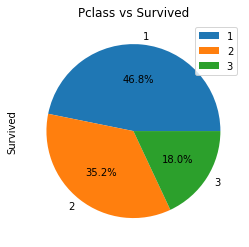

In [529]:
train_df_p.plot(kind='pie', autopct = '%2.1f%%', subplots=True, label=None)
plt.title('Pclass vs Survived')

## Name column

In [530]:
for df in combine:
    df['Title'] = df.Name.str.split(', ', expand=True)[1]
    df['Title'] = df.Title.str.split('.', expand=True)[0]
    print(df['Title'].unique())
pd.crosstab(train_df['Title'], train_df['Sex'])

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [531]:
#發現幾個Title資料樣本較為稀少，將它們分為一類，總共5大類
raretitle= ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','the Countess']
train_df.Title = train_df.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')
train_df.Title = train_df.Title.replace(['Sir','Don'], 'Mr')
train_df.Title = train_df.Title.replace(raretitle,'Rare')
print(train_df.Title.unique())
pd.crosstab(train_df['Title'], train_df['Sex'])

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


Sex,female,male
Title,,
Master,0,40
Miss,187,0
Mr,0,519
Mrs,125,0
Rare,2,18


In [532]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [533]:
raretitle= ['Rev','Dr','Col']
test_df.Title = test_df.Title.replace('Ms', 'Miss')
test_df.Title = test_df.Title.replace('Dona', 'Mrs')
test_df.Title = test_df.Title.replace(raretitle,'Rare')
print(test_df.Title.unique())
pd.crosstab(test_df['Title'], test_df['Sex'])

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


Sex,female,male
Title,,
Master,0,21
Miss,79,0
Mr,0,240
Mrs,73,0
Rare,0,5


In [534]:
#再次確認'Age'缺失值
for df in combine:
    df.drop('Name',axis=1, inplace=True)
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## Sex column

In [535]:
#查看性別與生存率關係
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Sex vs Survived')

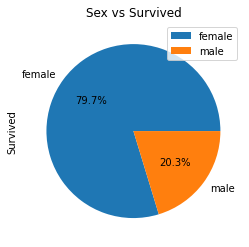

In [536]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind='pie', autopct = '%2.1f%%', subplots=True, label=None)
plt.title('Sex vs Survived')

In [537]:
train_df['Sex'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

## Age column

In [538]:
#用特徵'Sex'、'Pclass'、'Title'群組起來取中位數，用來填充'Age'中的缺失值
train_df[['Pclass', 'Sex', 'Age', 'Title']].groupby(['Pclass', 'Sex', 'Title']).median()
grp = train_df.groupby(['Pclass','Sex','Title'])['Age'].median().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grp

,Sex,Pclass,Title,Age
0,0,1,Miss,30.0
1,0,1,Mrs,41.5
2,0,1,Rare,41.0
3,1,1,Master,4.0
4,1,1,Mr,40.0
5,1,1,Rare,50.0
6,0,2,Miss,24.0
7,0,2,Mrs,32.0
8,1,2,Master,1.0
9,1,2,Mr,31.0


In [539]:
def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]
train_df['Age'], test_df['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in combine]

In [540]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

<AxesSubplot:title={'center':'Survived = 0'}, xlabel='Age', ylabel='Frequency'>

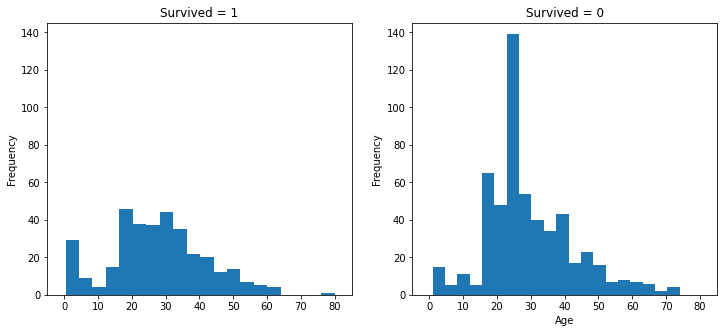

In [541]:
fig, axes = plt.subplots(nrows=1, ncols=2)
train_df[train_df['Survived']==1]['Age'].plot(kind='hist', bins = 20,
                                              ax=axes[0], figsize=(12, 5), 
                                              xlim=[-5,85], ylim=[0, 145],
                                              xlabel = 'Age',title='Survived = 1')
plt.xlabel('Age')
train_df[train_df['Survived']==0]['Age'].plot(kind='hist', bins = 20,
                                              ax=axes[1], figsize=(12, 5),
                                              xlim=[-5,85], ylim=[0, 145], 
                                              xlabel = 'Age',title='Survived = 0')

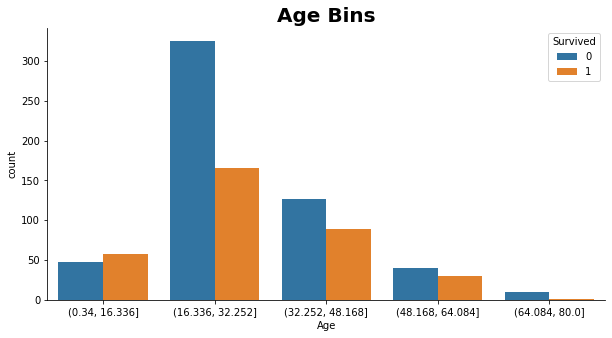

In [542]:
age_binned = pd.cut(train_df['Age'], 5)
fig, axs = plt.subplots(figsize=(10, 5))
sns.countplot(x=age_binned, hue='Survived', data=train_df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [543]:
group_name = [i for i in range(5)]
for df in combine:
    bins = np.linspace(min(df['Age']), max(df['Age']), 6)
    df['Age'] = pd.cut(df['Age'], bins=bins, labels = group_name, include_lowest=True)

In [544]:
train_df.Age.value_counts()

1    490
2    216
0    104
3     70
4     11
Name: Age, dtype: int64

In [545]:
test_df.Age.value_counts()

1    229
2    101
3     42
0     36
4     10
Name: Age, dtype: int64

In [546]:
#也將Title量化
for df in combine:
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_mapping)

In [547]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,0,2,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,0,2,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,2,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,1,0,0,211536,13.0000,NaN,S,5
887,888,1,1,0,1,0,0,112053,30.0000,B42,S,2
888,889,0,3,0,1,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,1,1,0,0,111369,30.0000,C148,C,1


## SibSp column + Parch colunm

In [548]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [549]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


        Survived
Family          
3       0.724138
2       0.578431
1       0.552795
6       0.333333
0       0.303538
4       0.200000
5       0.136364
7       0.000000
10      0.000000


<AxesSubplot:xlabel='Family', ylabel='count'>

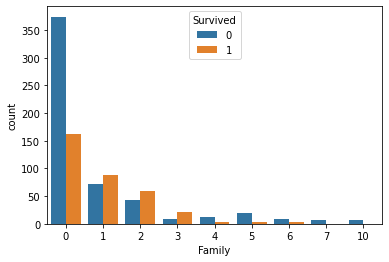

In [550]:
for df in combine:
    df['Family'] = df['SibSp']+df['Parch']
print(train_df[['Family', 'Survived']].groupby(['Family']).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x="Family", hue="Survived", data=train_df)

In [551]:
for df in combine:
    df.loc[ df['Family'] == 1, 'Family'] = 0                            # Alone
    df.loc[(df['Family'] > 1) & (df['Family'] <= 4), 'Family'] = 1  # Small Family 
    df.loc[(df['Family'] > 4) & (df['Family'] <= 6), 'Family'] = 2  # Medium Family
    df.loc[df['Family']  > 6, 'Family'] = 3                             # Large Family 

<AxesSubplot:xlabel='Family', ylabel='count'>

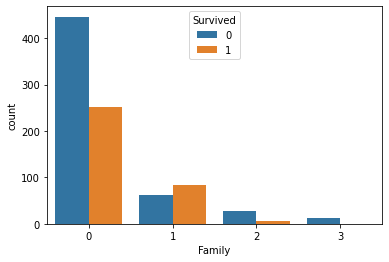

In [552]:
sns.countplot(x="Family", hue="Survived", data=train_df)

In [553]:
for df in combine:
    df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Fare

In [554]:
fare_label = [i for i in range(4)]
bins = np.linspace(min(train_df['Fare']), max(train_df['Fare']), 5)
train_df['Fare_binned'] = pd.cut(train_df['Fare'], bins, labels = fare_label, include_lowest = True)
train_df[['Fare_binned', 'Survived']].groupby(['Fare_binned']).mean()

,Survived
Fare_binned,
0,0.368113
1,0.724138
2,0.666667
3,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


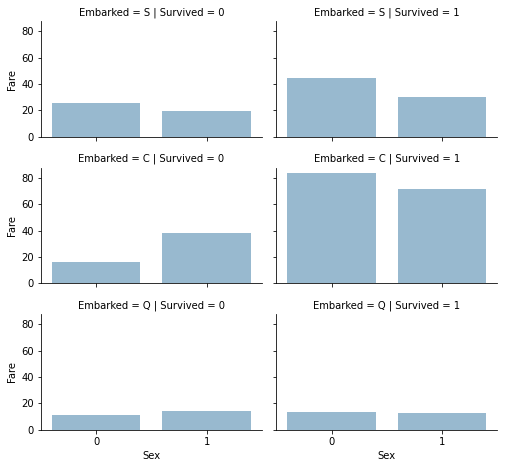

In [555]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [556]:
pd.crosstab(train_df['Fare_binned'], train_df['Survived'])

Survived,0,1
Fare_binned,,
0,539,314
1,8,21
2,2,4
3,0,3


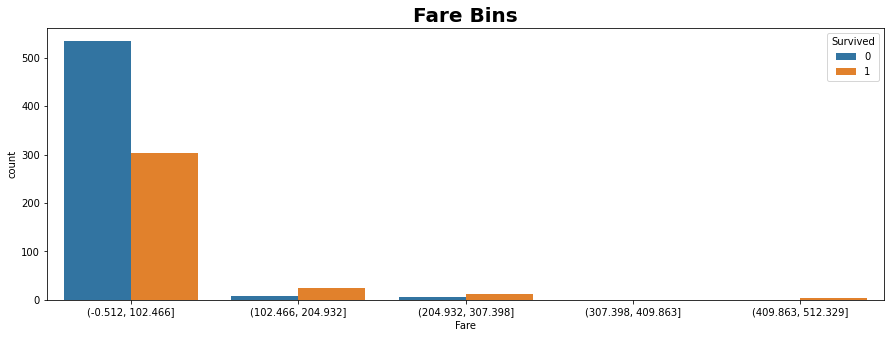

In [557]:
bins = np.linspace(min(test_df['Fare']), max(test_df['Fare']), 5)
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df['Fare_binned'] = pd.cut(test_df['Fare'], bins, labels = fare_label, include_lowest = True)
auxfare = pd.cut(train_df['Fare'],5)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfare, hue='Survived', data=train_df).set_title("Fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [558]:
train_df = train_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['Fare'], axis=1)

# Embarked

In [559]:
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [560]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [561]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# 

In [562]:
train_df = train_df.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
#the answer need PassengerId
PassengerId = test_df['PassengerId']
test_df = test_df.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)

In [563]:
print(train_df.isnull().sum())
print(train_df.dtypes)
train_df

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Title          0
Family         0
Fare_binned    0
dtype: int64
Survived          int64
Pclass            int64
Sex               int64
Age            category
Embarked          int64
Title             int64
Family            int64
Fare_binned    category
dtype: object


,Survived,Pclass,Sex,Age,Embarked,Title,Family,Fare_binned
0,0,3,1,1,0,1,0,0
1,1,1,0,2,1,3,0,0
2,1,3,0,1,0,2,0,0
3,1,1,0,2,0,3,0,0
4,0,3,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,5,0,0
887,1,1,0,1,0,2,0,0
888,0,3,0,1,0,2,1,0
889,1,1,1,1,1,1,0,0


In [564]:
print(test_df.isnull().sum())
print(test_df.dtypes)
test_df

Pclass         0
Sex            0
Age            0
Embarked       0
Title          0
Family         0
Fare_binned    0
dtype: int64
Pclass            int64
Sex               int64
Age            category
Embarked          int64
Title             int64
Family            int64
Fare_binned    category
dtype: object


,Pclass,Sex,Age,Embarked,Title,Family,Fare_binned
0,3,1,2,2,1,0,0
1,3,0,3,0,3,0,0
2,2,1,4,2,1,0,0
3,3,1,1,0,1,0,0
4,3,0,1,0,3,1,0
...,...,...,...,...,...,...,...
413,3,1,1,0,1,0,0
414,1,0,2,1,3,0,0
415,3,1,2,0,1,0,0
416,3,1,1,0,1,0,0


In [565]:
train_df.Age = train_df.Age.astype(int)
train_df.Fare_binned = train_df.Fare_binned.astype(int)
test_df.Age = test_df.Age.astype(int)
test_df.Fare_binned = test_df.Fare_binned.astype(int)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

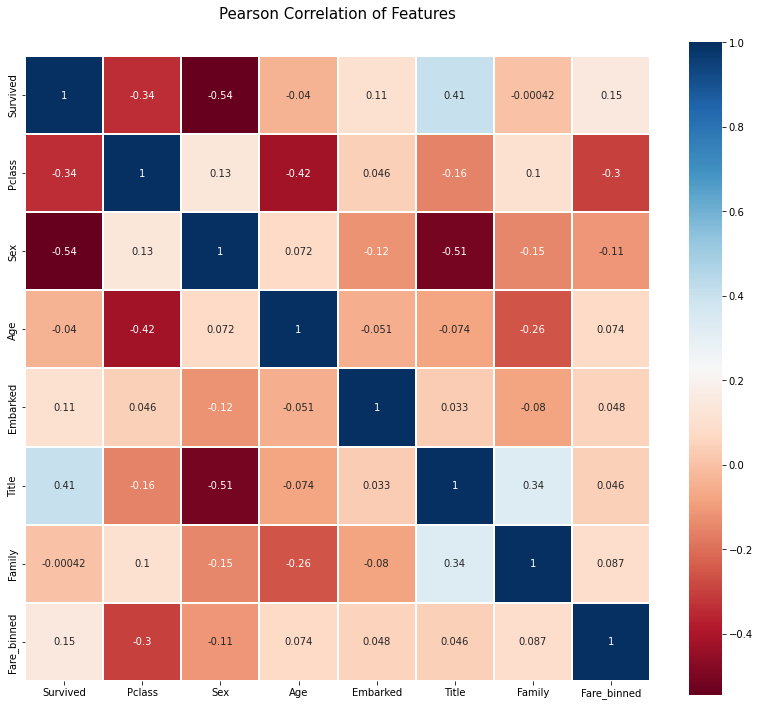

In [566]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Model, predict and solve
* KNN or k-Nearest Neighbors
* Decision Tree
* Logistic Regression
* Support Vector Machines


In [567]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape , Y_train.shape, X_test .shape

((891, 7), (891,), (418, 7))

In [568]:
X_train.corr()

,Pclass,Sex,Age,Embarked,Title,Family,Fare_binned
Pclass,1.000000,0.131900,-0.421119,0.045702,-0.156166,0.101771,-0.298580
Sex,0.131900,1.000000,0.072355,-0.116569,-0.512177,-0.146707,-0.114771
Age,-0.421119,0.072355,1.000000,-0.051325,-0.073557,-0.255475,0.073895
Embarked,0.045702,-0.116569,-0.051325,1.000000,0.032823,-0.079974,0.047596
Title,-0.156166,-0.512177,-0.073557,0.032823,1.000000,0.335323,0.046193
Family,0.101771,-0.146707,-0.255475,-0.079974,0.335323,1.000000,0.086853
Fare_binned,-0.298580,-0.114771,0.073895,0.047596,0.046193,0.086853,1.000000


### KNN

In [569]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [570]:
knn_cv = GridSearchCV(KNN, parameters, cv=10).fit(X_train, Y_train)

In [571]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
knn_cv.best_estimator_.score(X_train, Y_train)

tuned hpyerparameters :(best parameters)  {'algorithm': 'brute', 'n_neighbors': 8, 'p': 2}
accuracy : 0.8261048689138576


0.8395061728395061

### Decision Tree

In [572]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [ 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [573]:
tree_cv = GridSearchCV(tree, parameters, cv=10).fit(X_train, Y_train)

In [574]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8294506866416977


In [575]:
tree_cv.best_estimator_.score(X_train, Y_train)

0.8417508417508418

### Logistic Regression

In [576]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [577]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10).fit(X_train, Y_train)

In [578]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
logreg_cv.best_estimator_.score(X_train, Y_train)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8103245942571785


0.813692480359147

### SVM

In [579]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid')}
svm = SVC()

In [580]:
svm_cv = GridSearchCV(svm, parameters, cv=10).fit(X_train, Y_train)
svm_cv

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [581]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
svm_cv.best_estimator_.score(X_train, Y_train)

tuned hpyerparameters :(best parameters)  {'kernel': 'rbf'}
accuracy : 0.8226716604244693


0.8338945005611672

### Decision Tree has the highest accuracy score

In [582]:
model = tree_cv.best_estimator_

In [583]:
model.score(X_train, Y_train)

0.8417508417508418

In [589]:
tree.fit(X_train, Y_train).score(X_train, Y_train)

0.8574635241301908

In [590]:
Y_pred = tree.predict(X_test)
Y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [585]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": Y_pred
    })
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
